In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from collections import Counter
plt.rcParams.update({'font.size': 22})
import sys

In [54]:
#Load and show catalog we're working with

catalog = pd.read_csv('dets_MAD20.txt', delim_whitespace=True, names=['No', 'date', 'time', 'lat', 'long', 'dep', 'mag', 'cc', 'mad', 'id'])
catalog.head()

#kill negative magnitude detections

catalog = catalog[catalog['mag'] > 0]

In [55]:
#turn year month day into datetime objects to use in plot
catalog['date'] = pd.to_datetime(catalog['date'], format='%Y/%m/%d')
catalog.head()

,No,date,time,lat,long,dep,mag,cc,mad,id
0,1,2017-11-21,00:18:49.080,16.83,-101.58,16.1,1.27,0.5018,32.94,2.017112e+13
1,9,2017-11-21,07:17:13.380,16.26,-100.91,20.3,2.42,0.3794,29.45,2.017122e+13
2,12,2017-11-21,07:53:16.480,16.26,-100.91,16.3,1.89,0.3900,30.28,2.017122e+13
3,13,2017-11-21,10:09:12.320,16.30,-100.77,10.0,1.42,0.3533,25.32,2.017113e+13
4,14,2017-11-21,10:15:05.300,16.26,-100.91,20.3,1.34,0.2710,21.03,2.017122e+13


In [70]:
#create variables for date and magnitude of seismic events

d = list(catalog['date'])
m = list(catalog['mag'])
m = [float(ma) for ma in m]
mkrsize = [int((float(ma)*20)) for ma in m]
#print(d,m)

#Verify same number of elements in both lists
print(len(mkrsize))
print(len(d))
print(len(m))

3058
3058
3058


Text(0.5, 1.0, 'Magnitud de los sismos a través del tiempo (Nov 2017- Nov 2018)')

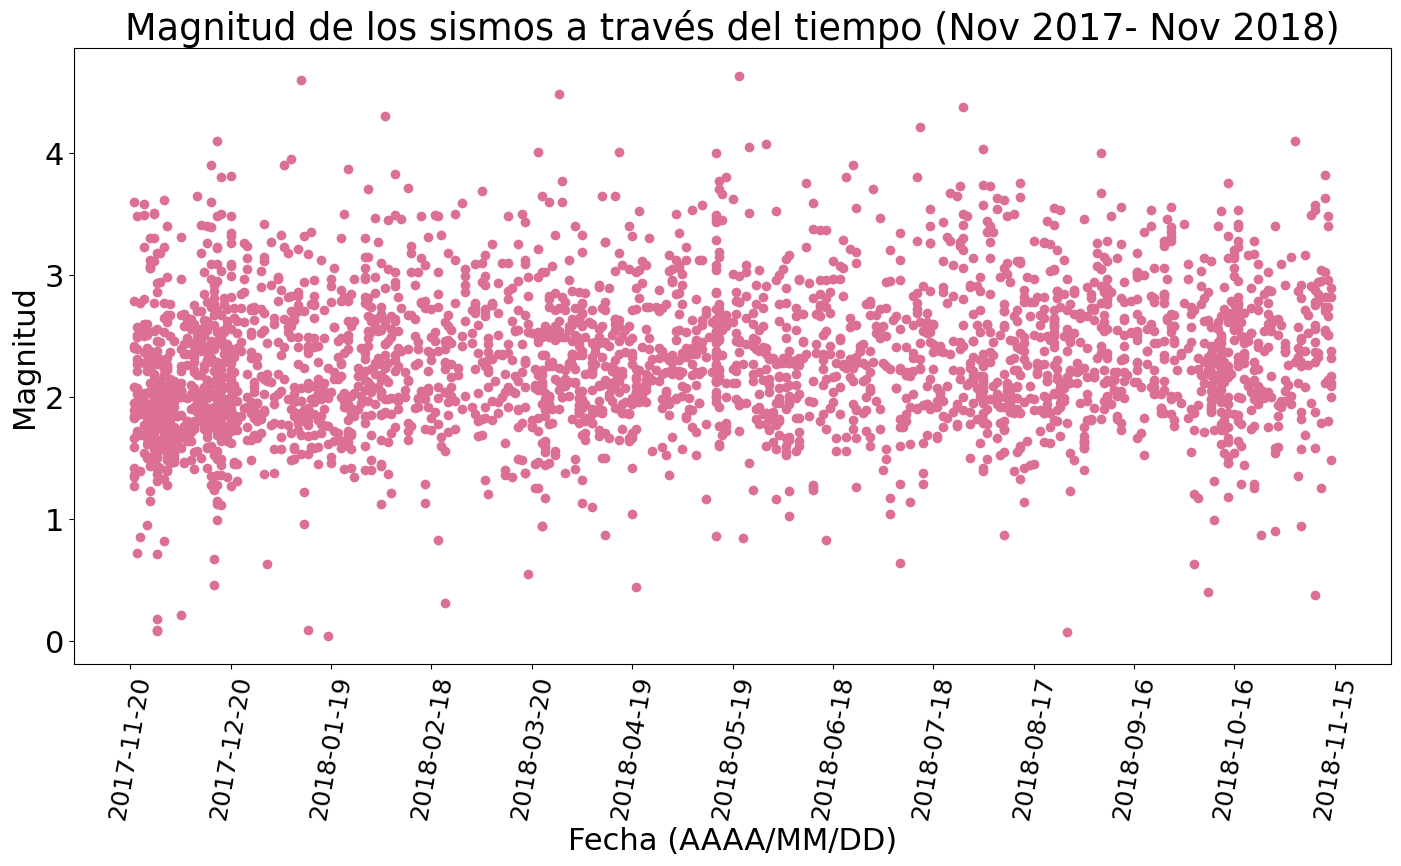

In [71]:
#plot date vs mag for events in catalog, as a simple scatter plot

fig, ax = plt.subplots(figsize=(17,8))
plt.scatter(d, m, color='palevioletred')
plt.xlabel('Fecha (AAAA/MM/DD)')
plt.ylabel('Magnitud')
plt.xticks(rotation=80)
plt.rcParams['xtick.labelsize'] = 18
ax.xaxis.set_major_locator(plt.MaxNLocator(14))
plt.title('Magnitud de los sismos a través del tiempo (Nov 2017- Nov 2018)')

Text(0.5, 1.0, 'Magnitud de los sismos a través del tiempo (Nov 2017- Nov 2018)')

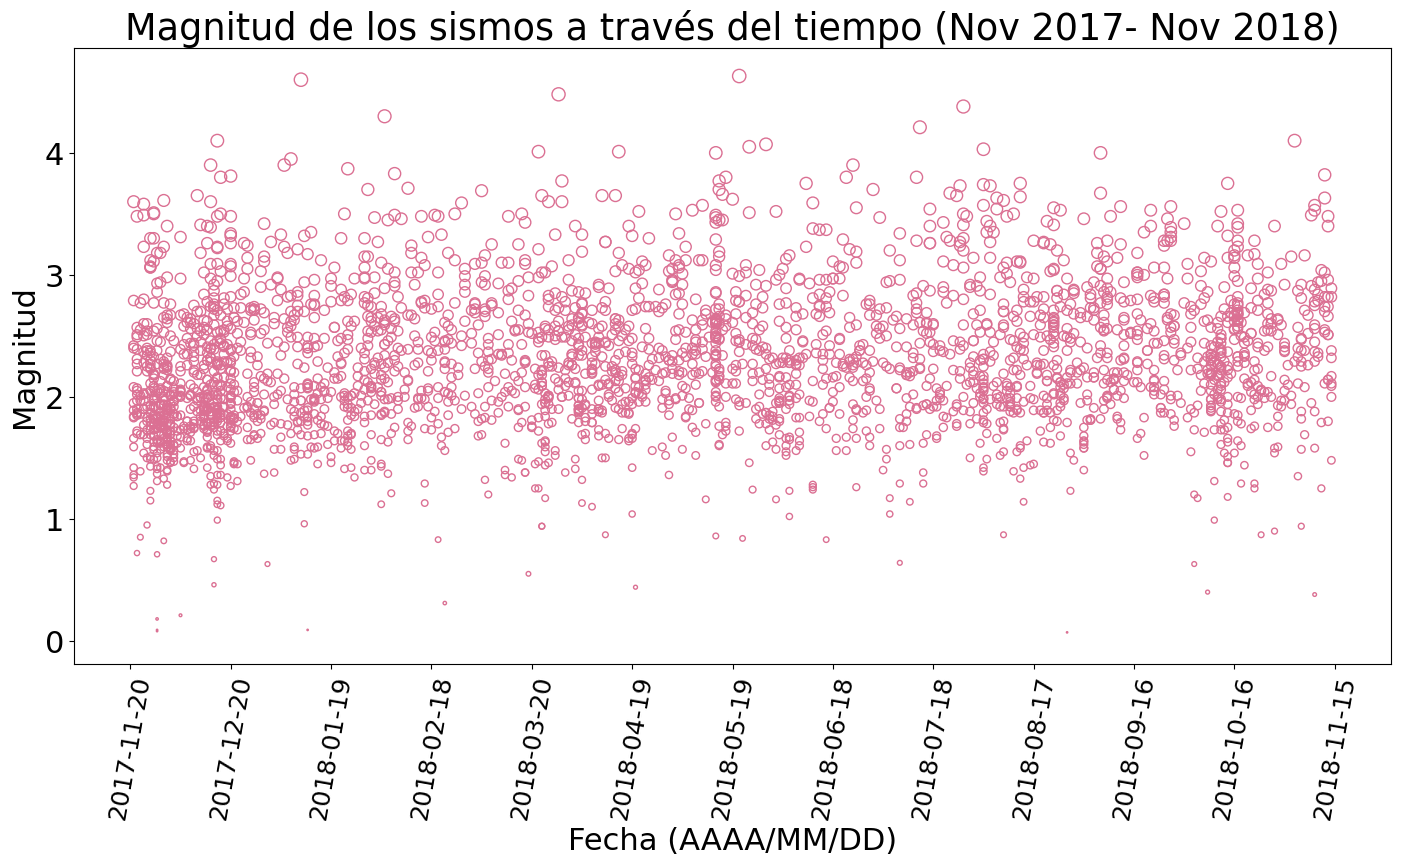

In [72]:
#plot date vs mag for events in catalog, changing size by magnitude parameter

fig, ax = plt.subplots(figsize=(17,8))
plt.scatter(d, m, s=mkrsize, facecolors='None', edgecolors='palevioletred')
plt.xlabel('Fecha (AAAA/MM/DD)')
plt.ylabel('Magnitud')
plt.xticks(rotation=80)
plt.rcParams['xtick.labelsize'] = 18
ax.xaxis.set_major_locator(plt.MaxNLocator(14))
plt.title('Magnitud de los sismos a través del tiempo (Nov 2017- Nov 2018)')

In [73]:
#Select events greater than 4.0 to plot individually 

greaterevents = catalog[catalog['mag'] > 4.0]

greaterevents.head()

dg = list(greaterevents['date'])
g = list(greaterevents['mag'])
g = [float(ge) for ge in g]

print(len(dg))
print(len(g))

13
13


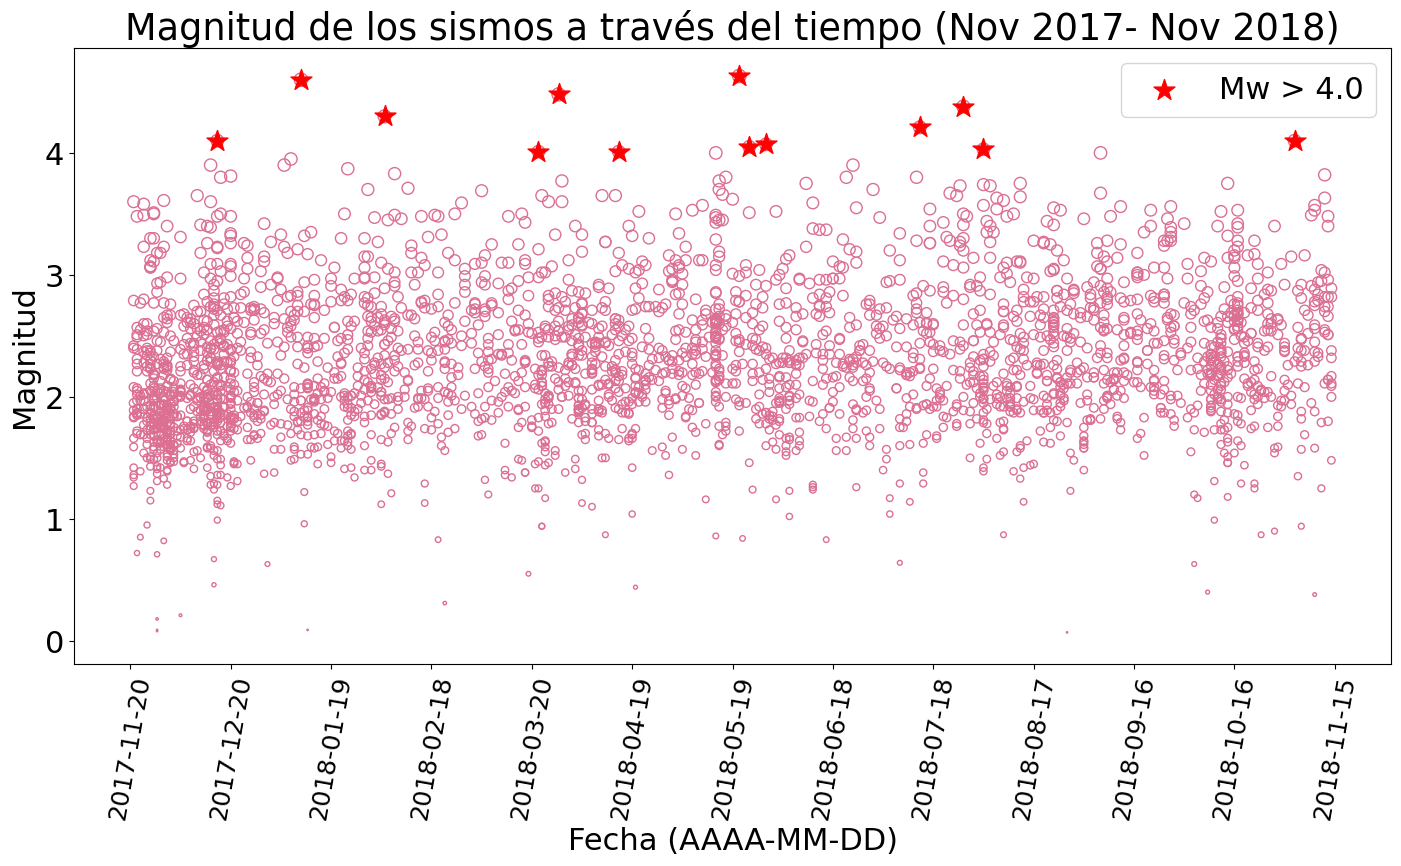

In [80]:
#plot date vs mag for events in catalog, by event magnitude, marking events greater than 4.0 with a red star

fig, ax = plt.subplots(figsize=(17,8))
plt.scatter(d, m, s=mkrsize, facecolors='None', edgecolors='palevioletred')
plt.scatter(dg, g, s=250, marker='*', color='r', label='Mw > 4.0')
plt.xlabel('Fecha (AAAA-MM-DD)')
plt.ylabel('Magnitud')
plt.xticks(rotation=80)
plt.rcParams['xtick.labelsize'] = 18
ax.xaxis.set_major_locator(plt.MaxNLocator(14))
plt.title('Magnitud de los sismos a través del tiempo (Nov 2017- Nov 2018)')
plt.legend()
plt.savefig('magvstime.png')